In [1]:
%pip install pandas numpy matplotlib nltk

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: pandas in c:\users\srpyv\appdata\local\packages\pythonsoftwarefoundation.python.3.11_qbz5n2kfra8p0\localcache\local-packages\python311\site-packages (2.2.3)




[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: C:\Users\srpyv\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [2]:
# Imports
import pandas as pd # type: ignore
import numpy as np # type: ignore
import matplotlib.pyplot as plt # type: ignore
import nltk # type: ignore
from nltk.sentiment.vader import SentimentIntensityAnalyzer # type: ignore
from nltk.corpus import stopwords # type: ignore
from nltk.tokenize import word_tokenize # type: ignore
from nltk.stem import WordNetLemmatizer # type: ignore

In [3]:
nltk.download('vader_lexicon')
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('punkt_tab')

# Load csv file that contains reviews with scores 1-5
file_path = 'amazon_reviews.csv'
df = pd.read_csv(file_path)

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\srpyv\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\srpyv\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\srpyv\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\srpyv\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\srpyv\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [4]:
# Preprocess text data: tokenize text, remove stopwords, lemmatize tokens, join into string
# LONG TRAINING TIME:~ 1m 10s
def preprocess_text(text):
    tokens = word_tokenize(str(text).lower())
    filtered_tokens = [token for token in tokens if token not in stopwords.words('english')]
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in filtered_tokens]
    return ' '.join(lemmatized_tokens)

print(f'Column names: {df.columns}')
df['reviewText'] = df['reviewText'].fillna('')
df['processed_review'] = df['reviewText'].apply(preprocess_text)

Column names: Index(['Unnamed: 0', 'asin', 'helpful', 'overall', 'reviewText', 'reviewTime',
       'reviewerID', 'reviewerName', 'summary', 'unixReviewTime'],
      dtype='object')


In [5]:
# Perform sentiment analysis using NLTK's VADER
analyzer = SentimentIntensityAnalyzer()

def get_sentiment_score(text):
    scores = analyzer.polarity_scores(text)
    return scores['compound']

# Add sentiment scores to the DataFrame
df['sentiment_score'] = df['processed_review'].apply(get_sentiment_score)

# Classify sentiment based on score thresholds
def classify_sentiment(score):
    if score > 0.05:
        return 'Positive'
    elif score < -0.05:
        return 'Negative'
    else:
        return 'Neutral'

df['sentiment'] = df['sentiment_score'].apply(classify_sentiment)

# Print sentiment distribution
print(df['sentiment'].value_counts())

sentiment
Positive    864
Negative     96
Neutral      39
Name: count, dtype: int64


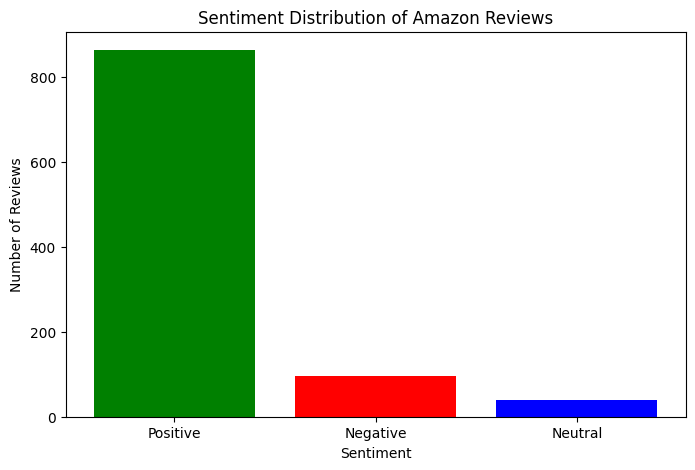

In [6]:
# Visualize Data in csv file
sentiment_counts = df['sentiment'].value_counts()
plt.figure(figsize=(8, 5))
plt.bar(sentiment_counts.index, sentiment_counts.values, color=['green', 'red', 'blue'])
plt.title('Sentiment Distribution of Amazon Reviews')
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.show()


In [7]:
while True:
    user_input = input("\nEnter a sentence (or type 'exit' to quit): ")
    if user_input.lower() == 'exit':
        print("Goodbye!")
        break
    
    sentiment_score = analyzer.polarity_scores(user_input)['compound']
    
    # Classify sentiment based on the score
    if sentiment_score > 0.05:
        sentiment = "Positive"
    elif sentiment_score < -0.05:
        sentiment = "Negative"
    else:
        sentiment = "Neutral"
    
    
    print(f"User input:  {user_input}")
    print(f"Predicted Sentiment: {sentiment}")

User input:  this is great
Predicted Sentiment: Positive
User input:  I am so happy
Predicted Sentiment: Positive
User input:  I am very sad
Predicted Sentiment: Negative
User input:  this is garbage
Predicted Sentiment: Neutral
User input:  this is trash
Predicted Sentiment: Neutral
User input:  this is very trash
Predicted Sentiment: Neutral
User input:  this is so awesome
Predicted Sentiment: Positive
User input:  print the sentence u shit
Predicted Sentiment: Negative
User input:  print this shit
Predicted Sentiment: Negative
User input:  why are you one behind?
Predicted Sentiment: Neutral
Goodbye!
